<center> <h1> Motora ģeometriskie parametri

Virzuļmotora degkamerai un cilindram ir izmērus un formu noteicoši parametri. <br>
Cilindru var vienkāršoti raksturot ar tā tilpumu. To savukārt nosaka diametrs (B) un virzuļa gājiens (L). Tilpumu, kas mainās virzuļa pārvietojuma robežās-no zemākā līdz augstākajam maiņas punktam apzīmē kā cilindra darba tilpumu ($V_d$).


Gavenie cilindra, virzuļa un kloķa-klaņa mehānisma ģeometriskie parametri parādīti sekojošā attēlā: <br>
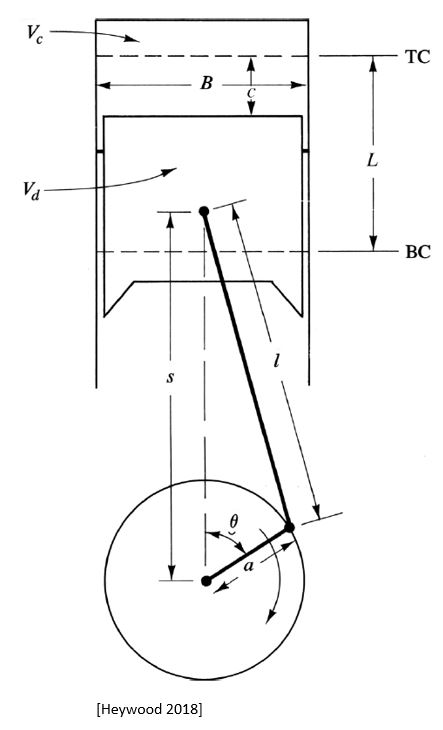
<!-- <div align="right">$[J.B. Heywood, 2018]$ <br> <br> -->
<center> 1. att. Cilindra, virzuļa un kloķa-klaņa mehānisma ģeometriskie parametri   <br>
    
    

<div align="left"> Vienādojums cilindra darba tilpuma aprēķinam: <br>

 $$V_d=\frac {\pi \cdot B^2 \cdot L}{4}$$
 kur<br>
&emsp;&emsp;$V_d$ - cilindra darba tilpums, $ m^{3};$<br>
&emsp;&emsp;$B$ - cilindra diametrs, $m;$,<br>
&emsp;&emsp;$L$ - virzuļa gājiens, $m.$<br>
Vienādojums kompresijas telpas tilpuma aprēķinam: <br>

 $$V_c=\frac {V_d}{r_c-1}$$
 kur<br>
&emsp;&emsp;$V_c$ - kompresijas telpas tilpums, $ m^{3};$<br>
&emsp;&emsp;$r_c$ - kompresijas pakāpe.<br>
Attālums starp kloķvārpstas asi un virzuļa pirksta asi pie jebkura  kloķvārpstas pagrieziena leņķa aprēķināms šādi:

$$s=a \cdot \cos\theta + (l^2-a^2 \cdot sin^2\theta)^\frac{1}{2}$$
 kur<br>
&emsp;&emsp;$a$ - kloķa garums, $ m;$<br>
&emsp;&emsp;$l$ - klaņa garums $m;$,<br>
&emsp;&emsp;$\theta$ - kloķvārpstas pagrieziena leņķis, $grādi.$<br>

Kloķa garums:

$$a=\frac {L}{2} $$ <br>

Motora cilindra pilnais tilpums pie jebkura kloķvārpstas pagrieziena leņķa aprēķināms šādi:

$$V_\theta=V_c + \frac {\pi \cdot B^2 \cdot L}{4} \cdot (l+a+s)$$ <br>

Savukārt motora cilindra pilnā tilpuma diferenciālis pie jebkura kloķvārpstas pagrieziena leņķa analītiski aprēķināms šādi:

$$\frac {dV_\theta}{d \theta}=\frac {\pi \cdot B^2 }{4} \cdot \left(\frac {a \cdot sin\theta + a^2 \cdot sin 2  \theta}{\sqrt{2\cdot(l^2-a^2 \cdot sin^2\theta}}\right) \cdot \frac {\pi}{180} $$ <br>


Apraksta turpinājumā izveidots kods *Python* sintaksē, lai aprēķinātu dažādus ar cilidra tilpumu saistītus paramaterus:
- kloķvārpstas pagrieziena lenķi katrā aprēķinu solī (CAD);
- cilindra darba tilpumu (Vd);
- kompresijas telpas tilpumu (Vc);
- cilindra pilno tilpumu pie katra kloķvārpstas pagrieziena grāda (Vth);
- cilindra tilpuma izmaiņas (diferenciāli), kloķvārpstai pagriežoties par noteiktu leņķi (dVth). <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


def volume_var_b (rc, l, Rbs, Vd, rpm):


    cad = np.linspace(0.1, 720, 7200)

    Vdm=Vd*10**(-6)
    B=((Vdm*4*Rbs)/np.pi)**(1/3) 
    
    Bm=B#Bore ,m
    L=Bm/Rbs #Stroke, m
    a=L/2# klokja garums, m
    lm=l/1000 #0.266 # klanja garums, m 
    A=np.pi*(Bm/2)**2 # virsmas laukums, m2
    R=lm/a #klaņa un kloķa attiecība
    N=rpm/60 # apgr/s
    Sp_av=2*L*N #videjais virzuļa ātrums

    Vc=Vdm/(rc-1)

    scad=lm+a-(a*np.cos(np.radians(cad))+(lm**2-a**2*np.sin(np.radians(cad))**2)**(1/2))

    Vth=Vc+A*scad
    
    dVth =(a*(np.sin(np.radians(cad)))+(a**2*(np.sin(2*np.radians(cad))))/(2*(lm**2-a**2*(np.sin(np.radians(cad))**2))**(1/2)))*((np.pi*B**2)/4)*(np.pi/180)*0.1
    
    Sp_ratio=(np.pi*np.sin(np.radians(cad))/2)*(1+(np.cos(np.radians(cad)))/(R**2-np.sin(np.radians(cad))**2)**(1/2))
    
    a_p=(np.pi**2)*Sp_av*N*(np.cos(np.radians(cad))+(np.cos(2*(np.radians(cad))))/R)
    S_p=Sp_ratio*Sp_av
    a_pr=a_p/(Sp_av*N)
 

    return a_pr, Sp_av, Bm, L, Vth, dVth, cad, a_p, S_p

<center> <h3> Kompresijas pakāpe

Degmaisījums vai gaiss motora cilindrā pirms sadedzes tiek saspiests. Cik lielā mērā tas notiek, ietekmē kompresijas pakāpe. <br>
Kompresijas pakāpe ir cilindra maksimālā un minimālā tilpuma attiecība.<br>

Kompresijas pakāpi var raksturot ar vienādojumu:
$$ r_c=\frac {V_d+V_c}{V_c}$$

Virzulim sasniedzot AMP, virs virzuļa paliek brīva telpa, ko var apzīmēt kā
kompresijas tilpumu $V_c$.<br>
Dzirsteļaizdedzes motoru $r_c$ ierobežo degmaisījuma patvaļīga aizdegšanās. $r_c$ šāda veida motoriem ir 7.5-10.<br>
Dīzeļmotoriem $r_c$ ir augstāka. Motoram ar augstāku $r_c$ saspiedes procesa beigās cilindrā ir augstāks spiediens un temperatūra.<br>
Dīzeļmotoru $r_c$ ierobežo motora detaļu izturība un $NO_x$ izmešu daudzums un $r_c$ vērtība ir robežās 15-22.


Sastādot un izpildot sekojošu kodu, var iegūt un grafiski attēlot cilindra tilpuma izmaiņas motora darba ciklā, mainoties kompresijas pakāpei. Mainot 6. un 7. koda rindā $r_c$ vērtības, un atkārtoti izpildot koda fragmentu, iespējams salīdzināt motora cilindra tilpumu un tā izmaiņas ar dažādu kompresijas pakāpi. <br>

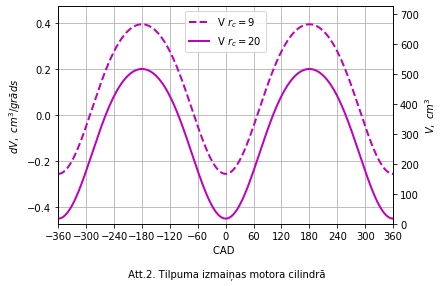

In [3]:
#sākotnējie parametri
Vd=500 #darba tilpums, cm3
rpm=4000 #rotācijas ātrums

#šeit var mainīt kompresijas pakāpi abiem aprēķinu variantiem:
rc_1=9 #kompresijas pakāpe
rc_2=20

Rbs_1=1 #diamatra/ gājiena attiecība. (1.4 motocikls, 0.8...1 vieglais automobilis , 0.4 lielie motori)
Rbs_2=1

l_1=120 #klaņa garums.
l_2=120

# apzīmējumi grafikos:
lbl_1='$ r_c=9 $'  
lbl_2='$ r_c=20 $'

#lbl_1='$ R_{bs} 0.4 $'  
#lbl_2='$ R_{bs} 1.4 $'

#Veic aprēķinu ar variantu sākotējiem parametriem:
ap_r_1, Sp_av_1, Bm_1, L_1, Vth_1, dVth_1, cad, a_p_1, S_p_1 =volume_var_b (rc_1, l_1, Rbs_1, Vd, rpm)

ap_r_2, Sp_av_2, Bm_2, L_2, Vth_2, dVth_2, cad_2, a_p_2, S_p_2 =volume_var_b (rc_2, l_2, Rbs_2, Vd, rpm)

#Izveido diagrammas:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()
ax1.grid()
ax1.set_ylabel('$dV, \ cm^3/grāds$')
ax2.set_ylabel('$V, \ cm^3$')
ax1.set_xlabel('CAD \n \n Att.2. Tilpuma izmaiņas motora cilindrā')

maxvaly1=np.max(dVth_1*10**6)
y1lim=maxvaly1+0.01
maxvaly2=np.max(Vth_1*10**6)
y2lim=maxvaly2+60
ax1.set_xlim(-360, 360)
ax1.set_ylim(-y1lim, y1lim)
ax2.set_ylim(0, y2lim)
ax1.xaxis.set_major_locator(MultipleLocator(60)) # distribute major ticks on x axis

#line, = ax1.plot(cad-360, dVth_1*10**6, label=('dV '+lbl_1), linestyle = '--', linewidth = 2, color='g')
line, = ax2.plot(cad-360, Vth_1*10**6, label=('V '+lbl_1 ), linestyle = '--',linewidth = 2, color='m')

#line, = ax1.plot(cad-360, dVth_2*10**6, label=('dV '+lbl_2), linestyle = '-', linewidth = 2, color='g')
line, = ax2.plot(cad-360, Vth_2*10**6, label=('V '+lbl_2), linestyle = '-',linewidth = 2, color='m')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show() 

<center> <h3> Cilindra diametra un virzuļa gājiena attiecība.

Motoriem mēdz būt atšķirīga cilindra diametra un virzuļa gājiena attiecība.<br>
Pie līdzīga darba tilpuma un kloķvārpstas apgriezieniem zemāks virzuļa ātrums būs motoram, kam cilindrs ir ar lielāku diametru un virzulim jāveic īsāks ceļš no zemākā maiņas punkta (ZMP) līdz augstākajam maiņas punktam (AMP).
Augsts virzuļa vidējais ātrums palielina inerces spēku radīto slodzi, jo virzulis gala stāvokļos apstājas un sāk kustību pretējā virzienā.<br>
Savukārt viens no faktoriem, kas ierobežo motora maksimālos apgriezienus ir gaisa skaņas ātruma sasniegšana ieplūdes vārsta ligzdā.<br>
Lielāks cilindra diametrs ļauj izveidot lielākas vārstu ligzdas.<br>
Diametra un gājiena attiecība:
$$R_{bs}=\frac{B}{L}$$
Klaņa un kloķa garumu attiecība:
$$R=\frac{l}{a}$$
Savukārt virzuļa vidējo ātrumu var aprēķināt šādi:
$$\overline S_p = \frac {2\cdot L\cdot N}{60}$$
kur<br>
&emsp;&emsp;    $ N$ - kloķvārpstas rotācijas ātrums, apgr./min<br>
Virzuļa momentānais ātrums:
$$S_p=\overline S_p\frac{\pi}{2}\sin \theta \left(  1+ \frac {\cos \theta}{\left( R^2-\sin ^2 \theta\right) ^{\frac {1}{2}}}\right)$$
Virzuļa paātrinājums:
$$ a_p=\pi ^2 \overline S_p N \left( \cos \theta + \frac{1}{R} \cos 2 \theta \right)$$
Piemēram, cilindra diametrs un virzuļa gājiens, apgriezieni un virzuļa vidējais ātrums pie maksimālās jaudas dažādiem motoriem parādīti šeit:<br>
- motocikla Kawasaki H2 motors: 76 × 52 mm; 14000 apgr./min (Maks. jauda); $R_{bs}$ = 1.46; $S_p$=24 m/s;
- automobiļa Nissan XTrail motors M9R: 85 × 101 mm; 3500 apgr/min; $R_{bs}$ = 0.84 ; $S_p$ = 11.7 m/s;
- kuģa motors Wärtsilä-Sulzer RTA96-C: 960 × 2500 mm; 120 apgr./min; $R_{bs}$ = 0. 38; $S_p$ = 10 m/s.

Modificējot iepriekš izveidoto aprēķinu kodu, var aprēķināt un izveidot virzuļa ātruma un relatīvā paātrinājuma diagrammas, un salīdzināt cilindra diamtera un virzuļa gājiena attiecības ietekmi uz virzuļa kustību.

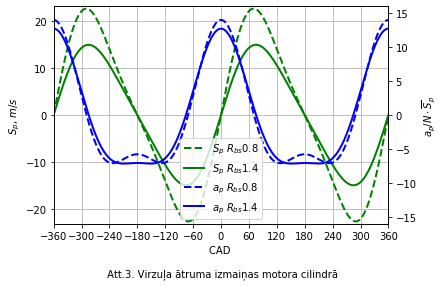

In [4]:
#sākotnējie parametri
Vd=500 #darba tilpums, cm3
rpm=4000 #rotācijas ātrums

#šeit var mainīt kompresijas pakāpi abiem aprēķinu variantiem:
rc_1=9 #kompresijas pakāpe
rc_2=9

Rbs_1=0.8 #diamatra/ gājiena attiecība. (1.4 motocikls, 0.8...1 vieglais automobilis , 0.4 lielie motori)
Rbs_2=1.4

l_1=120 #klaņa garums.
l_2=120

# apzīmējumi grafikos:
#lbl_1='$ r_c=9 $'  
#lbl_2='$ r_c=20 $'

lbl_1='$ R_{bs} 0.8 $'  
lbl_2='$ R_{bs} 1.4 $'

#Veic aprēķinu ar variantu sākotējiem parametriem:
ap_r_1, Sp_av_1, Bm_1, L_1, Vth_1, dVth_1, cad, a_p_1, S_p_1 =volume_var_b (rc_1, l_1, Rbs_1, Vd, rpm)

ap_r_2, Sp_av_2, Bm_2, L_2, Vth_2, dVth_2, cad_2, a_p_2, S_p_2 =volume_var_b (rc_2, l_2, Rbs_2, Vd, rpm)
fig, ax1 = plt.subplots() 
#ax1.xaxis.set_major_locator(MultipleLocator(1)) # distribute major ticks on x axis
#ax1.yaxis.set_major_locator(MultipleLocator(5)) # distribute major ticks on y axis

ax2 = ax1.twinx()
ax1.grid()
ax1.set_ylabel('$S_p$, $m/s$')
ax2.set_ylabel('$a_p/N \cdot \overline {S}_p$')

ax1.set_xlabel('CAD \n \n Att.3. Virzuļa ātruma izmaiņas motora cilindrā')

maxvaly1=np.max(S_p_1)
y1lim=maxvaly1+0.5
maxvaly2=np.max(ap_r_1)
y2lim=maxvaly2+2
ax1.set_xlim(-360, 360)
ax1.set_ylim(-y1lim, y1lim)
ax2.set_ylim(-y2lim, y2lim)
ax1.xaxis.set_major_locator(MultipleLocator(60)) # distribute major ticks on x axis

line, = ax1.plot(cad-360, S_p_1, label=('$S_p$ '+lbl_1), linestyle = '--', linewidth = 2, color='g')
line, = ax2.plot(cad-360, ap_r_1, label=('$a_p$ '+lbl_1 ), linestyle = '--',linewidth = 2, color='b')

line, = ax1.plot(cad-360, S_p_2, label=('$S_p$ '+lbl_2), linestyle = '-', linewidth = 2, color='g')
line, = ax2.plot(cad-360, ap_r_2, label=('$a_p$ '+lbl_2), linestyle = '-',linewidth = 2, color='b')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show() 

Trešajā attēlā redzams, ka motoriem ar vienādu cilindra darba tilpumu bet salīdzinoši lielāka diametra cilindru, virzuļa ātrums un paātrinājums ir mazāki. Tāpat redzams, ka motoriem ar salīdzinoši nelielu klaņa un kloķa attiecību (3...3.5), ir nevienmērīgs virzuļa kustības sadalījums motora ciklā. Virzulis ātrāk pārvietojas, tuvojoties AMP un no tā attālinoties (gājiena augšējā daļā).

<center> <h3> Klaņa un kloķa garumu attiecības ietekme

Mainot aprēķinu kodā klaņa garumu, bet pārējos parametrus iestatot abiem aprēķinu variantiem vienādus, var ievērtēt ietekmi un virzuļa kustību.

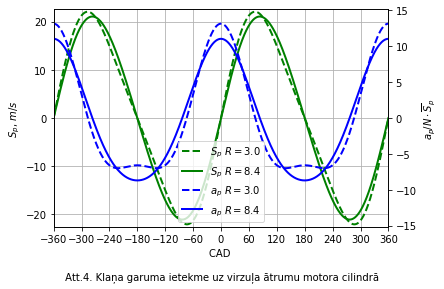

In [5]:
#sākotnējie parametri
Vd=500 #darba tilpums, cm3
rpm=4000 #rotācijas ātrums

#šeit var mainīt kompresijas pakāpi abiem aprēķinu variantiem:
rc_1=9 #kompresijas pakāpe
rc_2=9

Rbs_1=0.8 #diamatra/ gājiena attiecība. (1.4 motocikls, 0.8...1 vieglais automobilis , 0.4 lielie motori)
Rbs_2=0.8

l_1=150 #klaņa garums.
l_2=420


#Veic aprēķinu ar variantu sākotējiem parametriem:
ap_r_1, Sp_av_1, Bm_1, L_1, Vth_1, dVth_1, cad, a_p_1, S_p_1 =volume_var_b (rc_1, l_1, Rbs_1, Vd, rpm)

ap_r_2, Sp_av_2, Bm_2, L_2, Vth_2, dVth_2, cad_2, a_p_2, S_p_2 =volume_var_b (rc_2, l_2, Rbs_2, Vd, rpm)

R_1=str(round((l_1/1000)/(L_1/2),1))
R_2=str(round((l_2/1000)/(L_2/2),1))

# apzīmējumi grafikos:

lbl_1='$ R= $'  + R_1
lbl_2='$ R= $' + R_2

fig, ax1 = plt.subplots() 
#ax1.xaxis.set_major_locator(MultipleLocator(1)) # distribute major ticks on x axis
#ax1.yaxis.set_major_locator(MultipleLocator(5)) # distribute major ticks on y axis

ax2 = ax1.twinx()
ax1.grid()
ax1.set_ylabel('$S_p$, $m/s$')
ax2.set_ylabel('$a_p/N \cdot \overline {S}_p$')

ax1.set_xlabel('CAD \n \n Att.4. Klaņa garuma ietekme uz virzuļa ātrumu motora cilindrā')

maxvaly1=np.max(S_p_1)
y1lim=maxvaly1+0.5
maxvaly2=np.max(ap_r_1)
y2lim=maxvaly2+2
ax1.set_xlim(-360, 360)
ax1.set_ylim(-y1lim, y1lim)
ax2.set_ylim(-y2lim, y2lim)
ax1.xaxis.set_major_locator(MultipleLocator(60)) # distribute major ticks on x axis

line, = ax1.plot(cad-360, S_p_1, label=('$S_p$ '+lbl_1), linestyle = '--', linewidth = 2, color='g')
line, = ax2.plot(cad-360, ap_r_1, label=('$a_p$ '+lbl_1 ), linestyle = '--',linewidth = 2, color='b')

line, = ax1.plot(cad-360, S_p_2, label=('$S_p$ '+lbl_2), linestyle = '-', linewidth = 2, color='g')
line, = ax2.plot(cad-360, ap_r_2, label=('$a_p$ '+lbl_2), linestyle = '-',linewidth = 2, color='b')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show() 

Ceturtajā attēlā parādīts, ka, relatīvi pret citiem ģeometriskajiem parametriem pieaugot klaņa garumam, virzuļa pārvietojuma ātrums visā ciklā kļūst simetriskāks. <br>
Mainot citu sākotnējo parametru vērtības, var iegūt interesējošās virzuļa kustības un tilpuma izmaiņu vērtības un izpētīt savstarpējās sakarības.

<center> <h2> Izmantotā literatūra

1. *J. B. Heywood*, ***Internal Combustion Engine Fundamentals***, 2018.
2. *R. Stone*, ***Internal Combustion Engines***, 1999.